### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Función para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Análisis de facturación
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturación total
print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


In [ ]:
# Sumando solo el precio de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

# Mostrar los resultados
print(f"Facturación Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:.2f}")

# Facturación total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


# 2. Ventas por categoría

In [ ]:

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categoría
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categoría en Tienda {i+1}:")

    # Diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Agregar al diccionario de la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        # Agregar al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categoría en Tienda 1:
  Electrónicos: $1290390700.00
  Muebles: $582928200.00
  Juguetes: $49062800.00
  Electrodomésticos: $1032375600.00
  Artículos para el hogar: $38316800.00
  Deportes y diversión: $126883700.00
  Libros: $25769400.00
  Instrumentos musicales: $276990500.00

Ventas por categoría en Tienda 2:
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversión: $81660600.00
  Electrónicos: $1286643600.00
  Artículos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodomésticos: $1026226300.00
  Libros: $31417000.00

Ventas por categoría en Tienda 3:
  Electrodomésticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversión: $123399200.00
  Electrónicos: $1101334500.00
  Juguetes: $61190400.00
  Artículos para el hogar: $44724600.00
  Libros: $26358900.00

Ventas por categoría en Tienda 4:
  Electrodomésticos: $879089600.00
  Muebles: $556628000.00
  Deportes y diversión: $10

In [ ]:
# Función para calcular y mostrar las ventas por categoría de una tienda
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en Tienda {numero}:")
    print(ventas)

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               

# 3. Calificación promedio de la tienda


In [ ]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificación' in producto:
                calificacion = float(producto['calificación'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


In [ ]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [23]:
from collections import defaultdict

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo mágico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex -

In [ ]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# El ingreso es simplemente el Precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Función para mostrar los 3 productos que más y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista única de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Envío promedio por tienda

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


In [ ]:
# Asegurar que el costo de envío es numérico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


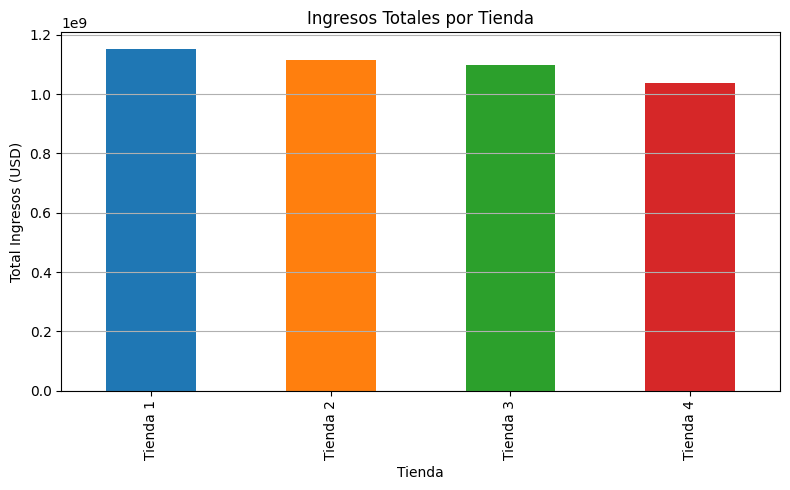

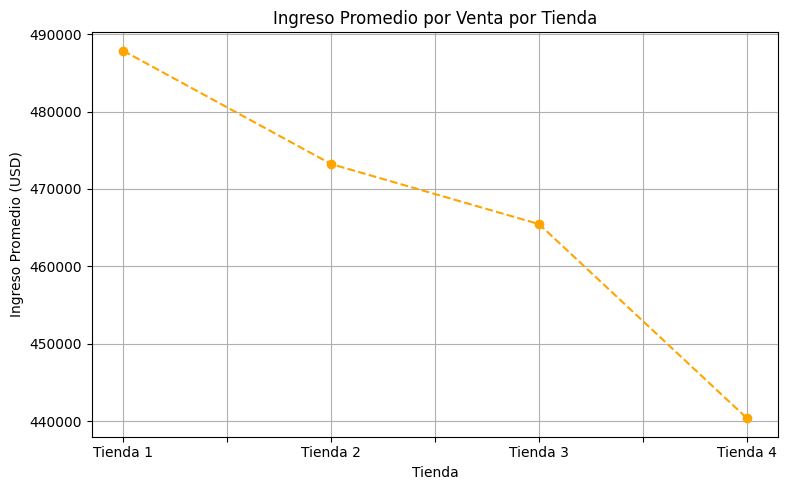

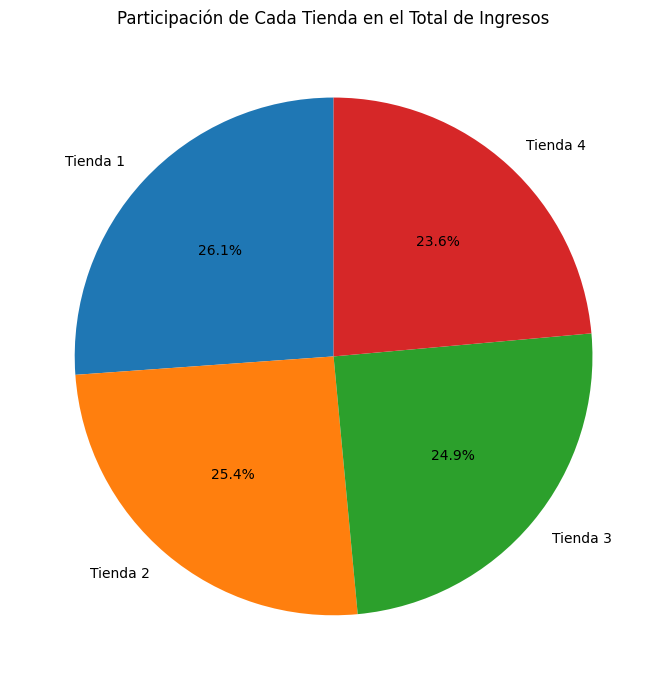

In [ ]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar tipo correcto
df_total['Precio'] = df_total['Precio'].astype(float)

# El ingreso de cada venta es simplemente el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# 🎨 Graficar 3 gráficos verdaderamente diferentes

colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar', color=colores)
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Línea: Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Torta/Pie: Distribución del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 📝 Informe Final del Análisis de Tiendas  

### 🎯 Introducción

El objetivo de este análisis es determinar en cuál de las **cuatro tiendas** (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) debería vender sus productos el Sr. Juan, considerando que desea quedarse con tres y vender una. Para ello, se evaluaron factores clave: ingresos totales por tienda, desempeño por categoría, calificaciones promedio de clientes, productos que generan más y menos ingresos, y costo promedio de envío. Con base en estos datos, se formula una recomendación fundamentada.

---

### 📊 Desarrollo del Análisis

#### 💰 1. Ingresos Totales por Tienda

Los ingresos totales muestran que la **tienda 1** fue la que generó el mayor volumen de ventas ($1,150,880,400), seguida de cerca por la tienda 2 ($1,116,343,500), luego la Tienda 3 ($1,098,019,600), y finalmente la tienda 4 ($1,038,375,700). Por lo tanto, la tienda 1 lidera en facturación, aunque con diferencias moderadas respecto a las demás.

#### 📦 2. Ventas por Categoría

En todas las tiendas, las categorías de *Electrónicos* y *Electrodomésticos* concentran la mayor parte de las ventas, representando el grueso del ingreso. Las ventas en categorías como *Juguetes*, *Libros* y *Artículos para el hogar* son comparativamente bajas en todas las tiendas.

La tienda 1 destaca en *Instrumentos musicales* y *Electrodomésticos*, mientras que la tienda 4 muestra un buen desempeño en *Electrónicos* y *Muebles*. La tienda 3 mantiene ventas robustas en *Electrodomésticos* y *Electrónicos*, aunque con un menor ingreso total que la tienda 1.

#### ⭐ 3. Calificaciones Promedio de los Clientes

Las calificaciones promedio son similares y positivas para todas las tiendas, con valores entre 3.98 y 4.05. la **tienda 3** tiene la mejor calificación (4.05), seguida por la tienda 2 (4.04), Tienda 4 (4.00), y finalmente la tienda 1 (3.98). Esto indica buena satisfacción general, con una ligera ventaja para la tienda 3.

#### 🛒 4. Productos que Más y Menos Dinero Generaron

En las tiendas, los productos más rentables son consistentes: *TV LED UHD 4K*, *Iphone 15* y *Refrigerador* están en el top 3 de cada tienda, reflejando alta demanda. Los productos con menor ingreso son similares en todas las tiendas (*Cuerda para saltar*, *Dinosaurio Rex*, *Cubo mágico 8x8*).

#### 🚚 5. Coste Promedio de Envío

El coste promedio de envío es más alto en la **tienda 1** ($26,018.61), seguido por la tienda 2 ($25,216.24), la tienda 3 ($24,805.68), y el más bajo en la tienda 4 ($23,459.46). Esto podría afectar la competitividad en precio para la tienda con costos de envío más altos.

---

### ✅ Conclusión y Recomendación Final

Considerando los factores:

- **Tienda 1** es la que genera el mayor ingreso total, pero tiene la calificación más baja y el costo de envío más alto.  
- **Tienda 2** presenta ingresos altos y buena calificación, aunque con un costo de envío intermedio.
- **Tienda 3** tiene la mejor calificación promedio y un costo de envío más bajo que Tienda 1, aunque sus ingresos totales son un poco menores.  
- **Tienda 4** ofrece el costo de envío más bajo, con ingresos moderados y calificaciones buenas.  


Dado que el Sr. Juan busca **vender una tienda y quedarse con tres**, la recomendación es que **venda la tienda con menor desempeño relativo en satisfacción y costos**, es decir, la **tienda 1**. Aunque genera mayores ingresos, sus costos de envío más altos y la calificación más baja la hacen menos atractiva a largo plazo.

Quedarse con las **tiendas 2, 3 y 4** le permite mantener un balance entre ingresos, satisfacción del cliente y costos competitivos, con la tienda 3 como la mejor evaluada en satisfacción y costos, la tienda 2 con ingresos fuertes, y la tienda 4 con costos bajos y buen desempeño.

---

**✅ Recomendación Final: el Sr. Juan debería considerar vender la Tienda 1**, y conservar las otras tres tiendas para un portafolio más equilibrado y rentable a largo plazo.

